In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [28]:
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [29]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [30]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Survived, dtype: int64

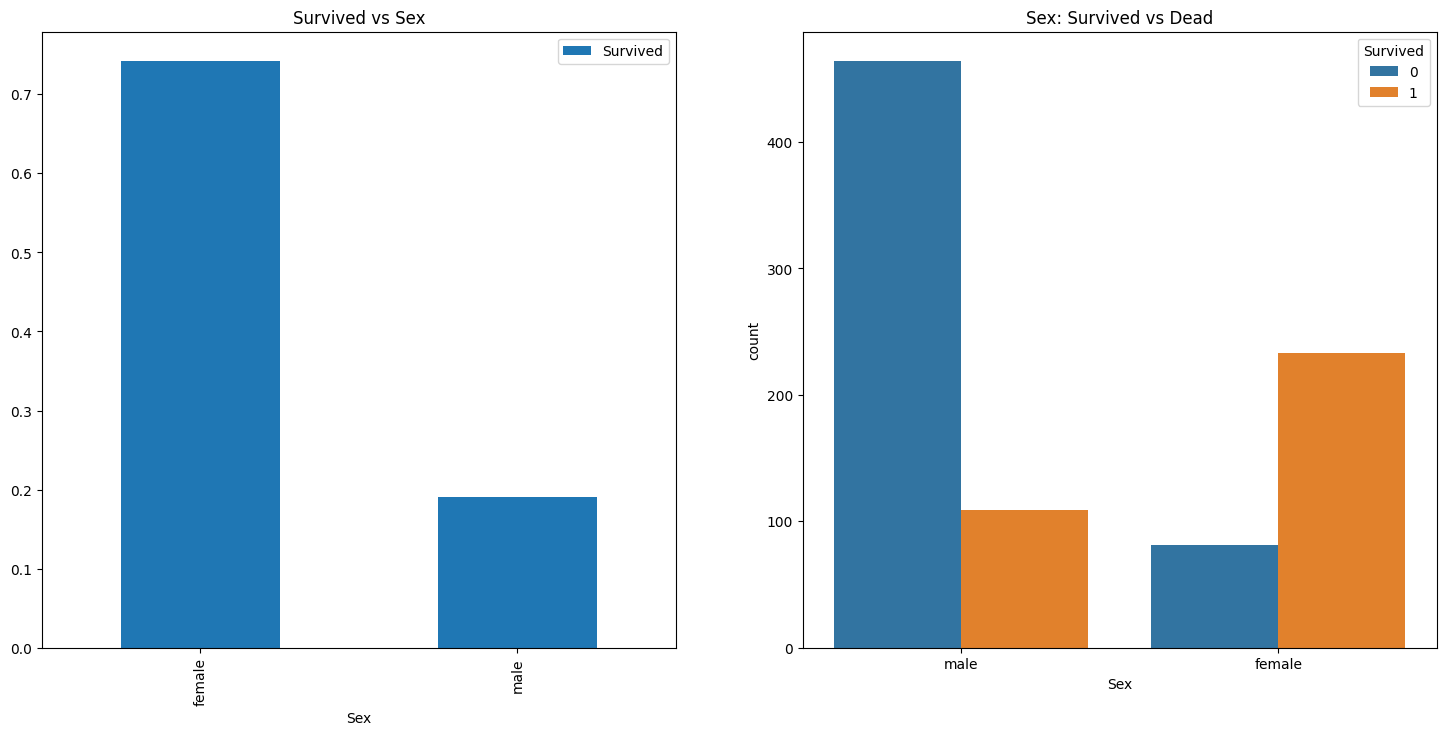

In [31]:

# Assuming 'df' is your DataFrame
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# First plot
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Second plot
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

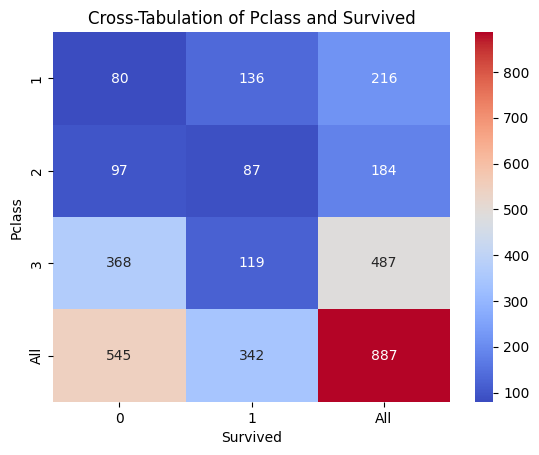

In [32]:
# Assuming 'df' is your DataFrame
cross_tab = pd.crosstab(df['Pclass'], df['Survived'], margins=True)

# Use Seaborn to style the table with a heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

# Display the table
plt.title('Cross-Tabulation of Pclass and Survived')
plt.show()

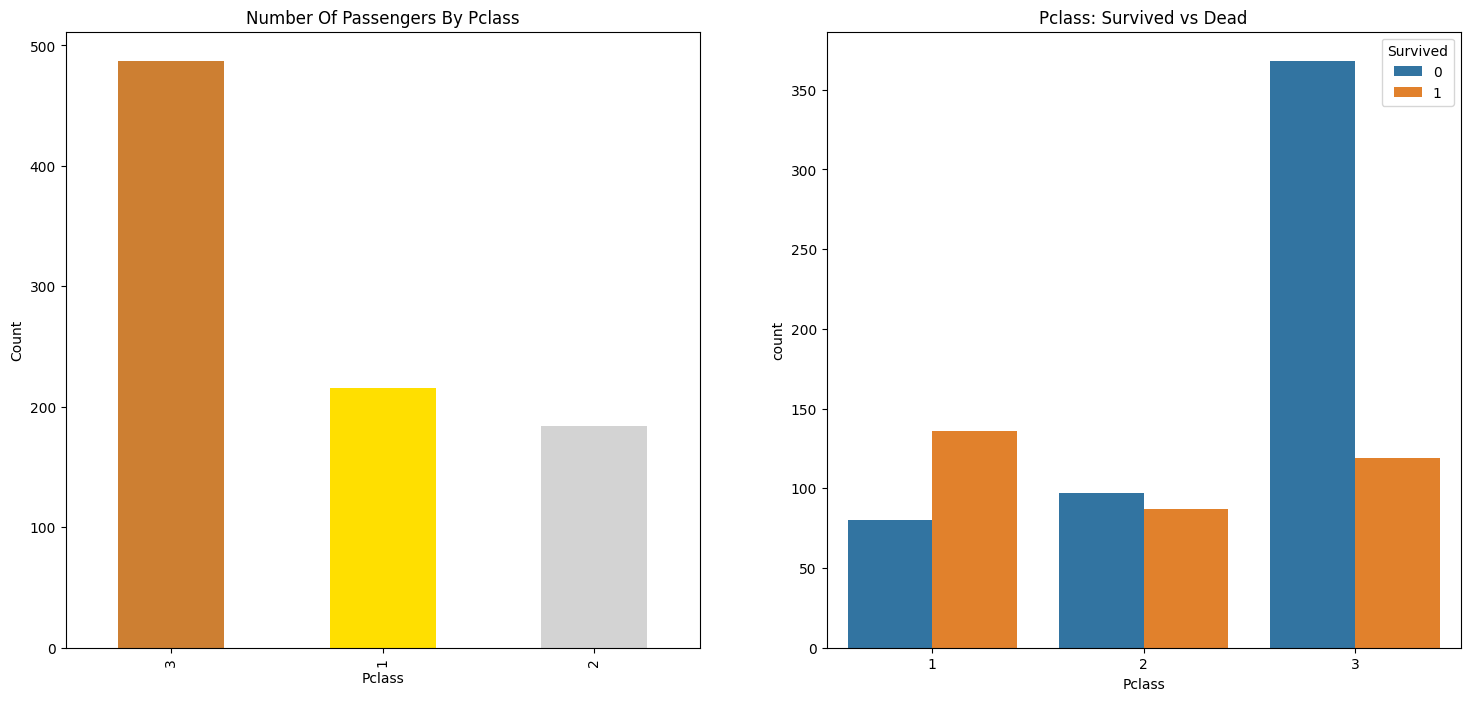

In [33]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot the number of passengers by Pclass
passenger_count = df['Pclass'].value_counts()
passenger_count.plot(kind='bar', color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax1)
ax1.set_title('Number Of Passengers By Pclass')
ax1.set_ylabel('Count')

# Plot Pclass vs. Survived using Seaborn countplot
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax2)
ax2.set_title('Pclass: Survived vs Dead')

# Show the plots
plt.show()

In [34]:
# Create the cross-tabulation table
cross_tab = pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True)

# Style the table with a background gradient
styled_cross_tab = cross_tab.style.background_gradient(cmap='coolwarm')

# Set the caption for the table
styled_cross_tab.set_caption('Cross-Tabulation of Sex, Survived, and Pclass')

# Display the styled table
styled_cross_tab

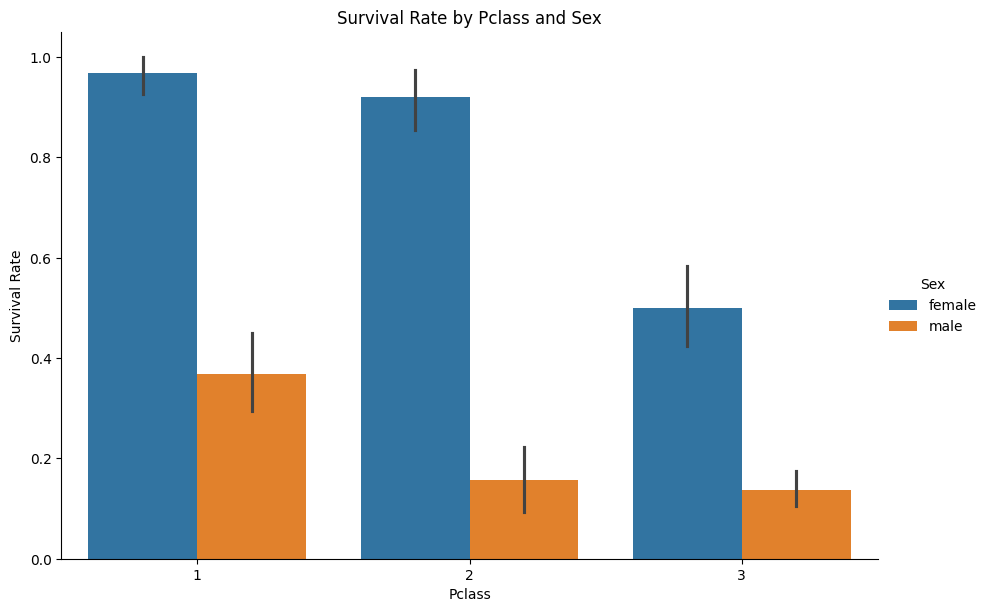

In [35]:
# Create a categorical plot using catplot
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)

# Set titles and labels
g.set_axis_labels('Pclass', 'Survival Rate')
g.set(title='Survival Rate by Pclass and Sex')

# Show the plot
plt.show()

In [36]:
# Assuming 'df' is your DataFrame
oldest_age = df['Age'].max()
youngest_age = df['Age'].min()
average_age = df['Age'].mean()

print('The oldest passenger was', oldest_age, 'years old')
print('The youngest passenger was', youngest_age, 'years old')
print('The average age on the ship was', round(average_age, 2), 'years')

The oldest passenger was 80.0 years old
The youngest passenger was 0.42 years old
The average age on the ship was 29.47 years


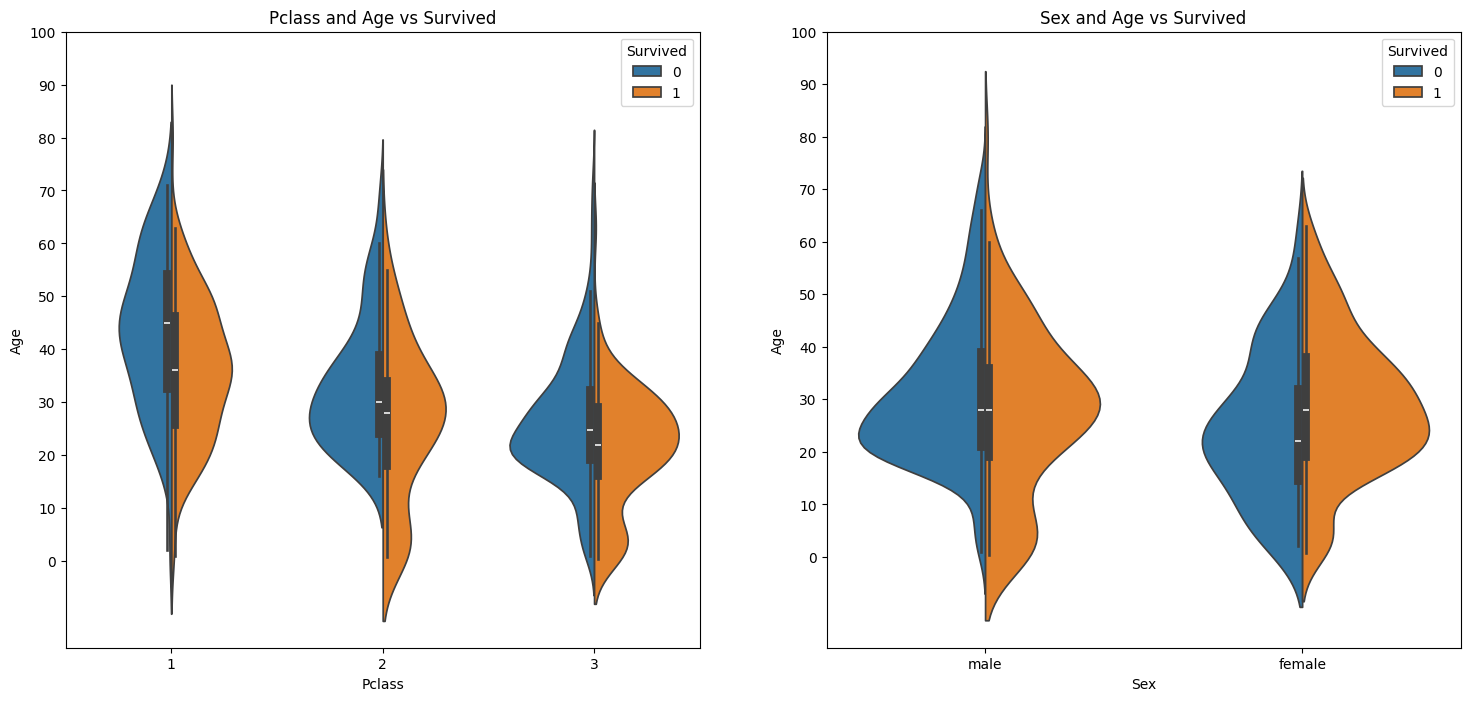

In [37]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Violin plot for Pclass and Age vs Survived
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Violin plot for Sex and Age vs Survived
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

# Show the plots
plt.show()

In [38]:
df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

# Display a few rows to verify the 'Initial' column
print(df['Initial'].head())

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['Initial'], df['Sex']).T

# Style the table with a background gradient
styled_cross_tab = cross_tab.style.background_gradient(cmap='coolwarm')

# Display the styled table
styled_cross_tab

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Me\AppData\Local\Temp\ipykernel_5968\3912616131.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,513,0,0,6,1


In [39]:
# Create a dictionary to map the values to their replacements
title_mapping = {
    'Mlle': 'Miss',
    'Mme': 'Miss',
    'Ms': 'Miss',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Lady': 'Mrs',
    'Countess': 'Mrs',
    'Jonkheer': 'Other',
    'Col': 'Other',
    'Rev': 'Other',
    'Capt': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr'
}

# Replace values in the 'Initial' column using the mapping
df['Initial'].replace(title_mapping, inplace=True)

In [40]:
missing_age = df['Age'].isnull().any()

if missing_age:
    print("There are remaining null values in the 'Age' column.")
else:
    print("There are no remaining null values in the 'Age' column.")

There are no remaining null values in the 'Age' column.


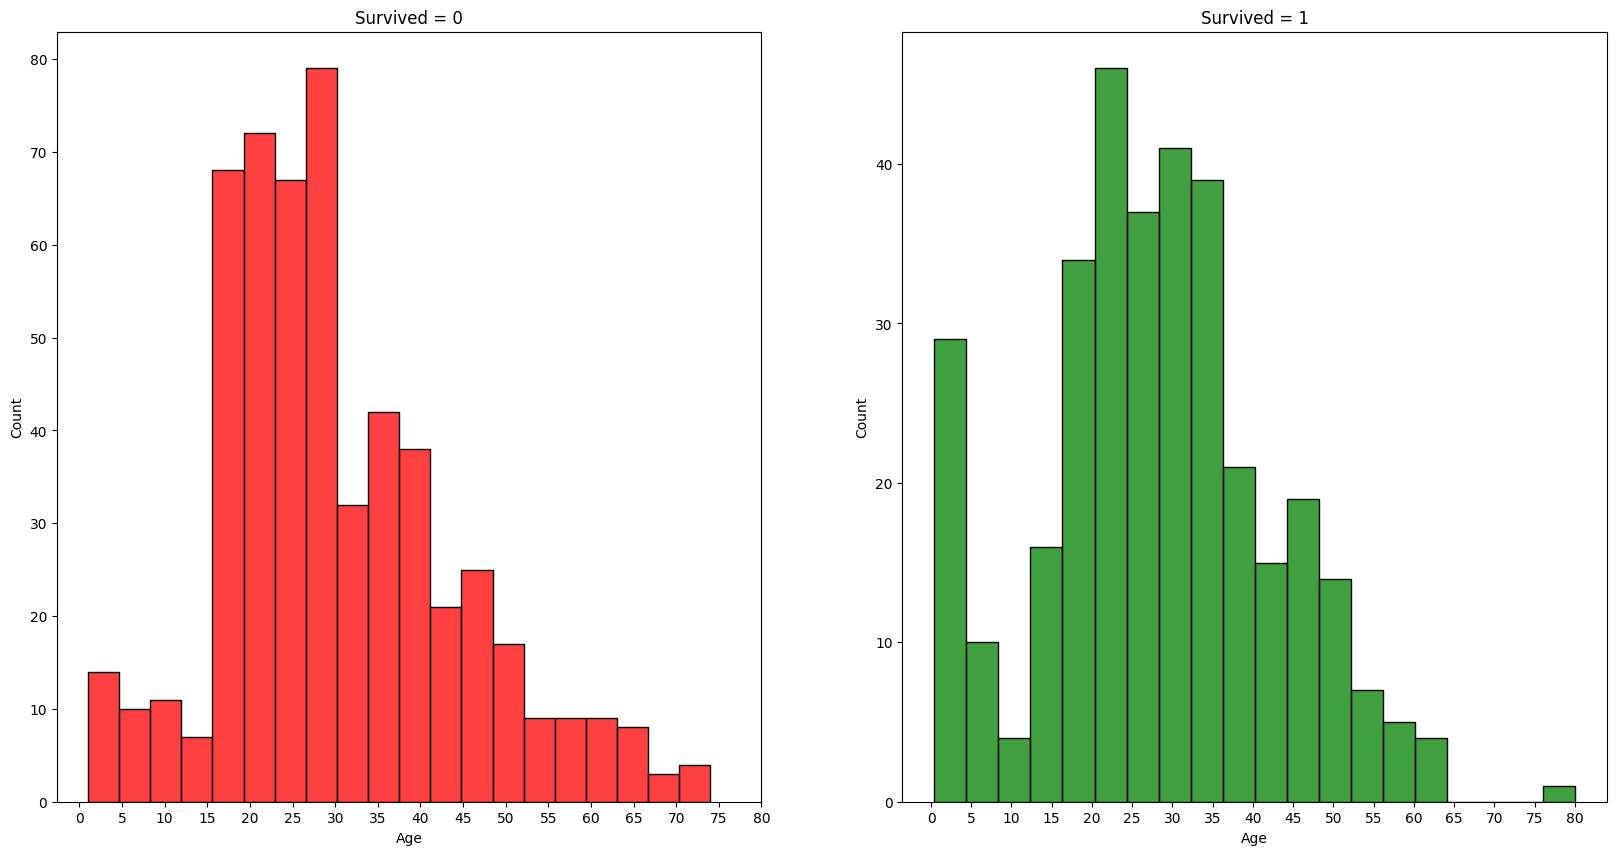

In [41]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot histograms for 'Survived=0' and 'Survived=1'
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, edgecolor='black', color='red', ax=axes[0])
axes[0].set_title('Survived = 0')
axes[0].set_xticks(range(0, 85, 5))

sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Survived = 1')
axes[1].set_xticks(range(0, 85, 5))

plt.show()

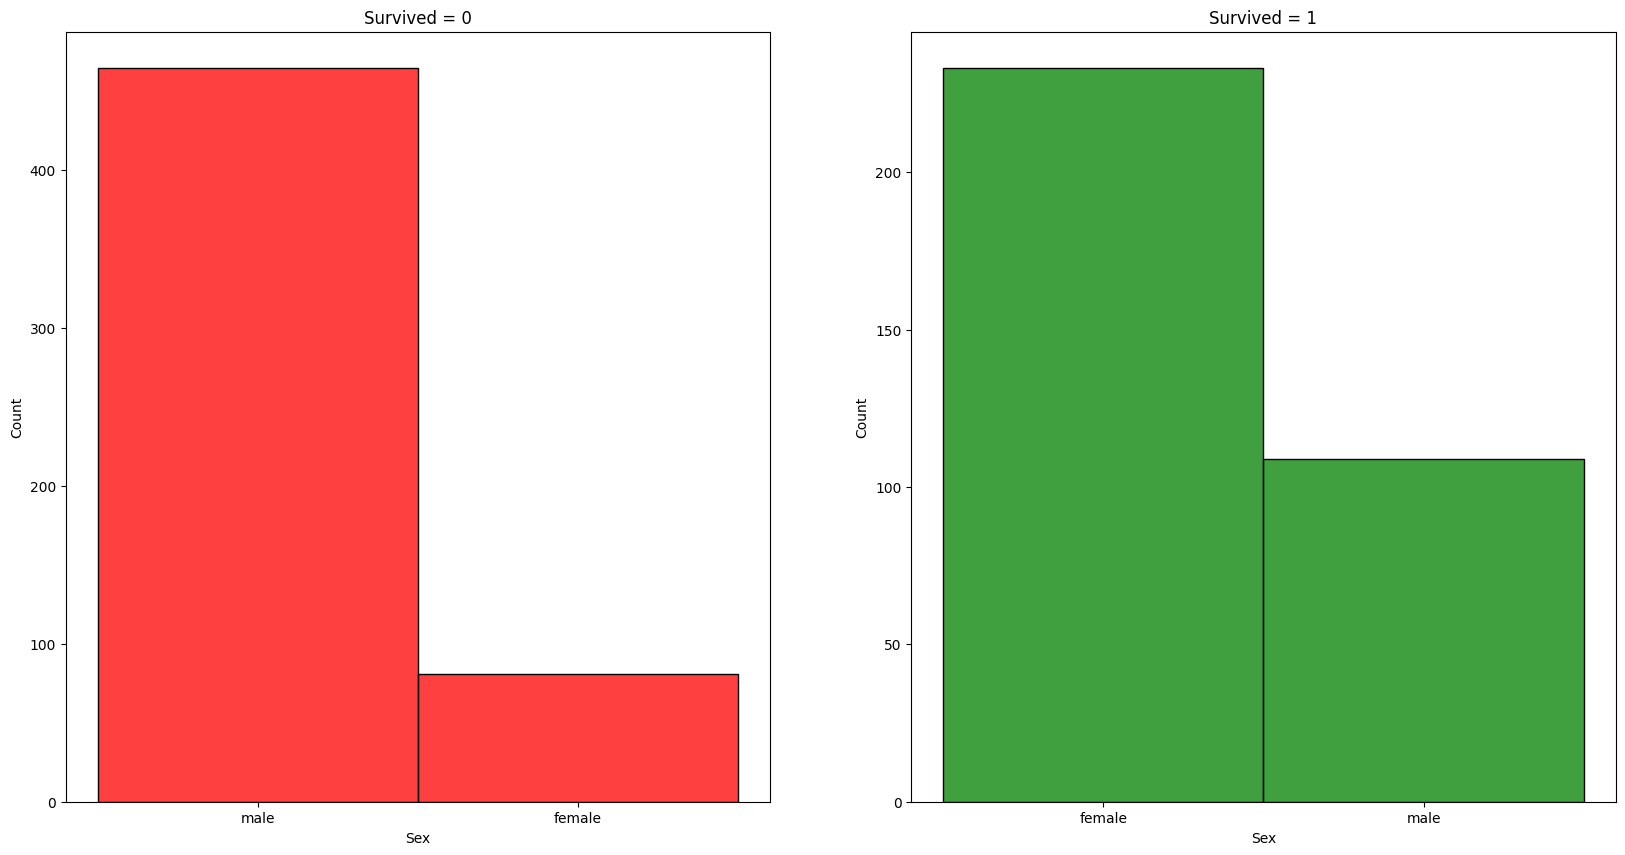

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot histograms for 'Survived=0' and 'Survived=1'
sns.histplot(df[df['Survived'] == 0]['Sex'], bins=2, edgecolor='black', color='red', ax=axes[0])
axes[0].set_title('Survived = 0')

sns.histplot(df[df['Survived'] == 1]['Sex'], bins=2, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Survived = 1')

plt.show()

In [43]:
highest_fare = df['Fare'].max()
lowest_fare = df['Fare'].min()
average_fare = df['Fare'].mean()

print(f'Highest Fare: {highest_fare:.2f}')
print(f'Lowest Fare: {lowest_fare:.2f}')
print(f'Average Fare: {average_fare:.2f}')


Highest Fare: 512.33
Lowest Fare: 0.00
Average Fare: 32.31


In [44]:
# Family Size
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

# Age Groups
bins = [0, 18, 30, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Fare per Person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Is Alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [45]:
# Check the column names in the DataFrame
column_names = df.columns
print(column_names)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Initial', 'FamilySize', 'AgeGroup',
       'FarePerPerson', 'IsAlone'],
      dtype='object')


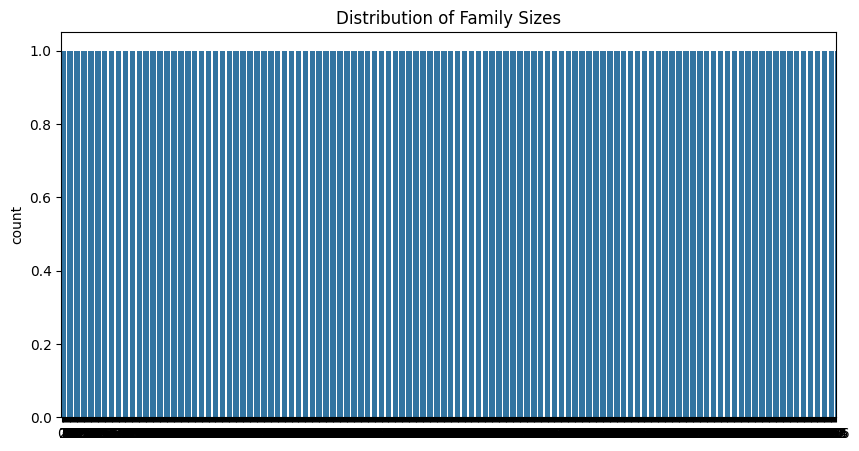

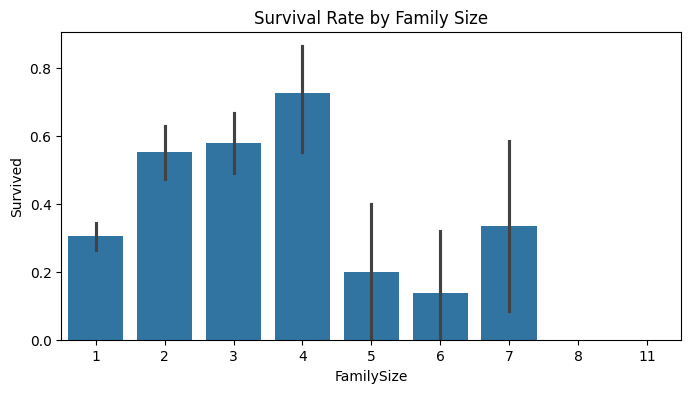

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(df['FamilySize'])
plt.title('Distribution of Family Sizes')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

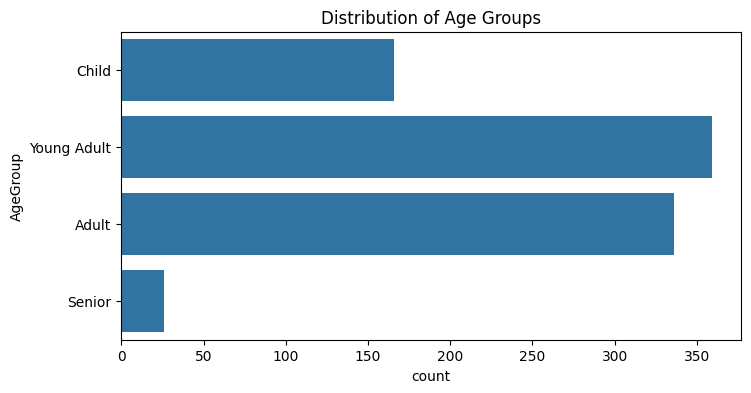

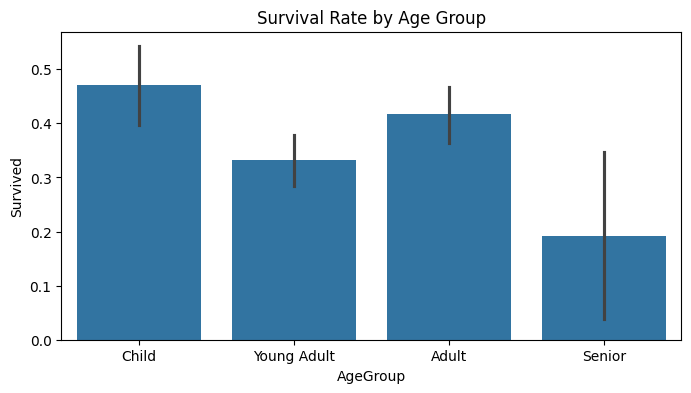

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(df['AgeGroup'])
plt.title('Distribution of Age Groups')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


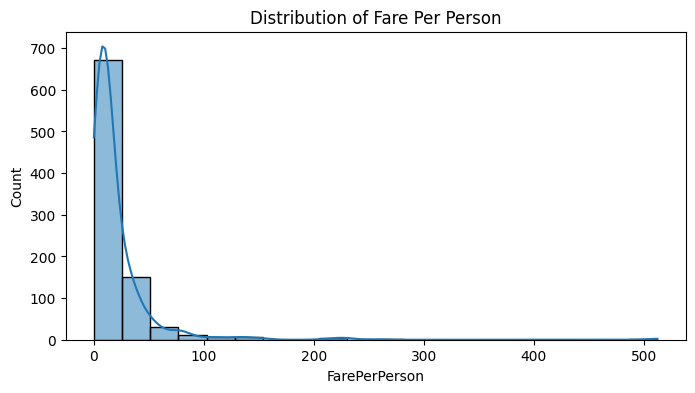

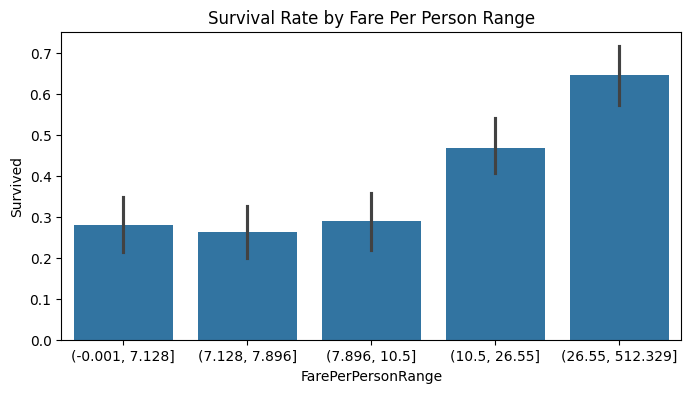

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df['FarePerPerson'], bins=20, kde=True)
plt.title('Distribution of Fare Per Person')
plt.show()

# Create fare per person ranges for better visualization
df['FarePerPersonRange'] = pd.qcut(df['FarePerPerson'], q=5)
plt.figure(figsize=(8, 4))
sns.barplot(x='FarePerPersonRange', y='Survived', data=df)
plt.title('Survival Rate by Fare Per Person Range')
plt.show()


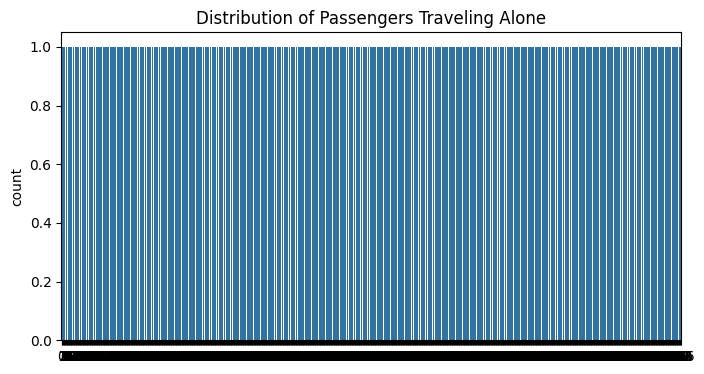

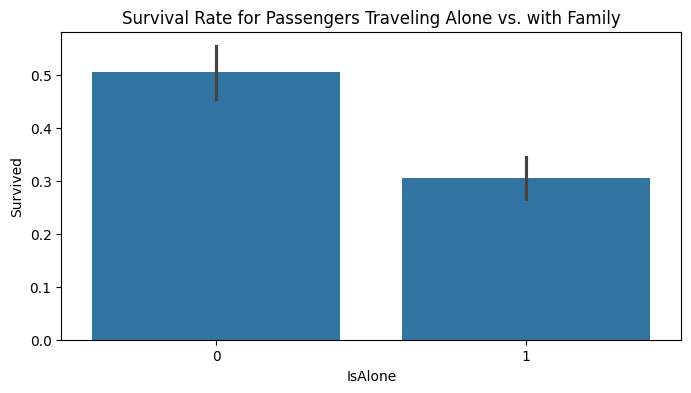

In [49]:
plt.figure(figsize=(8, 4))
sns.countplot(df['IsAlone'])
plt.title('Distribution of Passengers Traveling Alone')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate for Passengers Traveling Alone vs. with Family')
plt.show()


In [50]:
import category_encoders as ce

# Create a BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Sex'])

# Apply binary encoding to 'Sex'
data_encoded = binary_encoder.fit_transform(df)


c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will 

In [56]:
# Calculate the mean 'Survived' value for each 'Name' category
name_survival_mapping = df.groupby('Name')['Survived'].mean().to_dict()

# Map the mean values to the 'Name' categories
data_encoded['Name_TargetEncoded'] = data_encoded['Name'].map(name_survival_mapping)

In [57]:
# Print the features and their data types
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    object  
 3   Sex_0                    887 non-null    int64   
 4   Sex_1                    887 non-null    int64   
 5   Age                      887 non-null    float64 
 6   Siblings/Spouses Aboard  887 non-null    int64   
 7   Parents/Children Aboard  887 non-null    int64   
 8   Fare                     887 non-null    float64 
 9   Initial                  887 non-null    object  
 10  FamilySize               887 non-null    int64   
 11  AgeGroup                 887 non-null    category
 12  FarePerPerson            887 non-null    float64 
 13  IsAlone                  887 non-null    int32   
 14  FarePerPer